https://www.kaggle.com/competitions/digit-recognizer/data

In [ ]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import csv
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

import random
import math

CREATES IMAGES AND ADDS THEM TO THE RIGHT LABELED FOLDER [image split is 80:20]

In [ ]:
os.system('mkdir data')

os.chdir('data/')
os.system('mkdir train')
os.system('mkdir test')
os.system('mkdir valid')
os.chdir('../')

os.chdir('data/train/')
i = 0
while i < 10:
    os.system('mkdir ' + str(i))
    i += 1
os.chdir('../../')

os.chdir('data/test/')
i = 0
while i < 10:
    os.system('mkdir ' + str(i))
    i += 1
os.chdir('../../')

os.chdir('data/valid/')
i = 0
while i < 10:
    os.system('mkdir ' + str(i))
    i += 1
os.chdir('../../')

dataRaw  = []
with open('digit-recognizer/train.csv', mode ='r')as file:
    csvFile = csv.reader(file)

    for lines in csvFile:
        dataRaw.append(lines)

arrData  = []
with open('digit-recognizer/train.csv', mode ='r')as file:
    csvFile = csv.reader(file)
    imgData = []

    for lines in csvFile:
        pixelArr = []
        label  = True

        for i in lines:
            if len(pixelArr) == 28:
                imgData.append(pixelArr)
                pixelArr = []
            
            if label:
                label = False
            else:
                pixelArr.append(i)        
        imgData.append(pixelArr)

        arrData.append(imgData)
        imgData = []

doneZero = False
for i in arrData:
    if doneZero:
        pixels = i
        array = np.array(pixels, dtype=np.uint8)

        new_image = Image.fromarray(array)
        label = dataRaw[arrData.index(pixels)][0]

        if random.randrange(10) > 1:
            if random.randrange(10) > 1:
                os.chdir('data/train/' + str(label) + '/')
                new_image.save(str(arrData.index(pixels)) + '.png')
                os.chdir('../../../')
            else:
                os.chdir('data/valid/' + str(label) + '/')
                new_image.save(str(arrData.index(pixels)) + '.png')
                os.chdir('../../../')
        else:
            os.chdir('data/test/' + str(label) + '/')
            new_image.save(str(arrData.index(pixels)) + '.png')
            os.chdir('../../../')
    else:
        doneZero = True

In [20]:
os.chdir('../../../')

In [21]:
train_path = 'data/train/'
test_path = 'data/test/'
valid_path = 'data/valid/'

In [23]:
classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
train_batches = ImageDataGenerator(preprocessing_function=None).flow_from_directory(directory=train_path, target_size=(28,28), classes=classes, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=None).flow_from_directory(directory=valid_path, target_size=(28,28), classes=classes, batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=None).flow_from_directory(directory=test_path, target_size=(28,28), classes=classes, batch_size=10, shuffle=False)

Found 26648 images belonging to 10 classes.
Found 6731 images belonging to 10 classes.
Found 8373 images belonging to 10 classes.


In [24]:
imgs, labels = next(train_batches)

In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(28,28))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

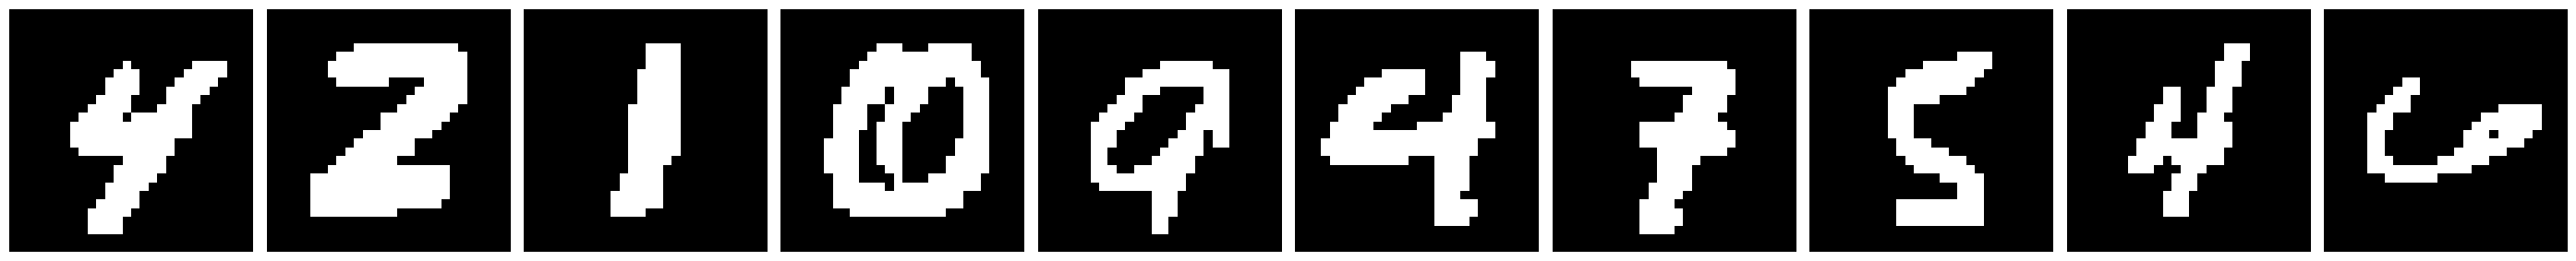

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [26]:
plotImages(imgs)
print(labels)

In [27]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(28,28,3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=10, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                31370     
Total params: 50,762
Trainable params: 50,762
Non-trainable params: 0
__________________________________________________

In [29]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=valid_batches, validation_steps=len(valid_batches), epochs=1, verbose=2)

2665/2665 - 212s - loss: 1.3318 - acc: 0.8727 - val_loss: 0.3639 - val_acc: 0.9430


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

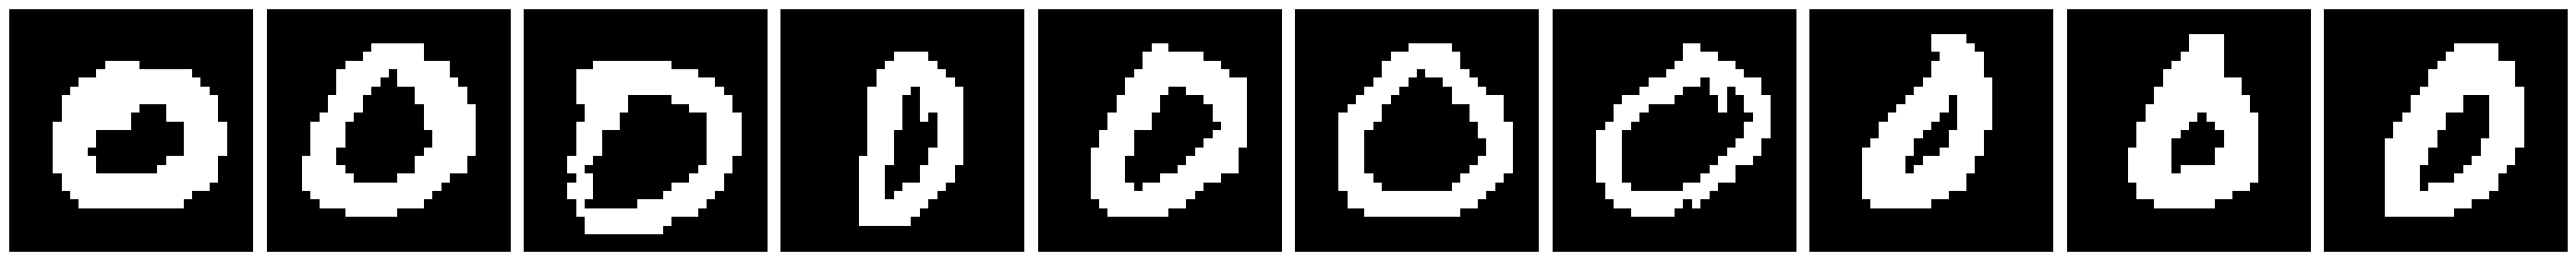

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [31]:
# loads test data
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [32]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [33]:
arrTru = []
arrFalse = []

In [34]:
i = 0
while i < len(predictions):
    preds0 = np.argmax(predictions[i])
    true0 = test_batches.classes[i]

    if preds0 == true0:
        arrTru.append(i)
    else:
        arrFalse.append(i)
    i+=1

In [35]:
print(len(arrTru))
print(len(arrFalse))

7913
460


In [36]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [37]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[850   0   3   1   2   6   4   0   1   2]
 [  0 902   9   6   1   5   2   1  10   1]
 [ 10   4 804  21   4   1   4   9   4   2]
 [  0   0   6 790   0  22   0   3   3   5]
 [  1   2   0   3 761   4   7   6   6  21]
 [  1   0   2   8   1 760   3   1   0   1]
 [  4   1   1   1   4  14 749   0   0   0]
 [  1   1  14   9   6   1   1 815   3  31]
 [  4   1  10  23   2  40   6   1 673  16]
 [  4   0   2   9   8   6   1  10   6 809]]


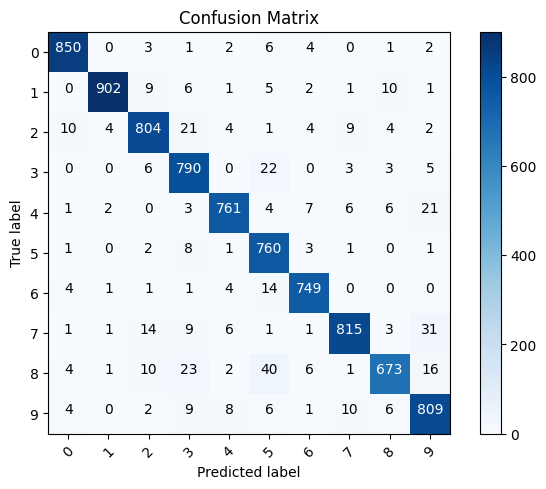

In [38]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')